## This is the translation and testing of previously written R functions
They will be:
### 1 genMA, a Robust function that generates Moving Average
### 2 Price projectiion, using linear, cubic, and quadratic regression for future price predictions



In [2]:
import pandas as pd
import csv
import plotly
#import plotly.graph_obcalled_listects as go
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import unittest
import os
import torch
import torch.nn as nn
import torch.nn.functional as F


In [3]:
#All dataframes are on the candle distribution unless otherwise stated. 
cu_df = pd.read_csv("Relevant Data/copper.csv")
#copper
au_df = pd.read_csv("Relevant Data/gold.csv")
#gold
ag_df = pd.read_csv("Relevant Data/silver.csv")
#silver
oil_df = pd.read_csv("Relevant Data/oil.csv")
ti_ppi_df = pd.read_csv("Relevant Data/Ti_PPI.csv")
ti_ppi_df = ti_ppi_df.reset_index(names=['new_index'])
#Titanium PPI (A monthly metric)


## Rewriting this function using coding guidelines of 5 lines max
1. Generate Index List - What I want is actually a list of lists with each list referenceing the index we need to calculate the averages. What is actually i, called_list, and k? How might I better describe these variables to make the function more intuitively make sense? I can stand for outer_list because it will serve as a reference to each indivdiual lists. called_list can stand for "called_list" because we need to call it using an index for the mean calculations. 
2. Call Index List for mean calculations - Call a list from the list of lists and reference price matrix for average
3. Use the two functions and return a list of the calculated averages

What I learned: append works if you have a list of multiple element. 

In [7]:
linear_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 1)
quadratic_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 2)
cubic_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 3)

linear_ti_ppi_poly = np.poly1d(linear_ti_ppi)
quadratic_ti_ppi_poly = np.poly1d(quadratic_ti_ppi)
cubic_ti_ppi_poly = np.poly1d(cubic_ti_ppi)


linear_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 1)
quadratic_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 2)
cubic_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 3)

linear_ti_ppi_poly = np.poly1d(linear_ti_ppi)
quadratic_ti_ppi_poly = np.poly1d(quadratic_ti_ppi)
cubic_ti_ppi_poly = np.poly1d(cubic_ti_ppi)

#moves the rows one to towards the front to be used as an endpoint for predictions
ti_ppi_df['shifted_close'] = ti_ppi_df['close'].shift(periods=-1)
ti_ppi_df['linear_p_x'] = np.polyval(linear_ti_ppi, ti_ppi_df['new_index'])
ti_ppi_df['quad_p_x'] = np.polyval(quadratic_ti_ppi, ti_ppi_df['new_index'])
ti_ppi_df['cubic_p_x'] = np.polyval(cubic_ti_ppi, ti_ppi_df['new_index'])


ti_ppi_df['net_change'] = ti_ppi_df['shifted_close'] - ti_ppi_df['close']
ti_ppi_df['percent_change'] = (ti_ppi_df['net_change'] / ti_ppi_df['close']) * 100



display(ti_ppi_df)

#ti_ppi_df.to_csv('Relevant Data/ti_ppi_df.csv', index=False)





,new_index,time,close,shifted_close,linear_p_x,quad_p_x,cubic_p_x,net_change,percent_change
0,0,1/1/1971,27.2,27.3,31.150715,17.618169,38.050900,0.1,0.367647
1,1,2/1/1971,27.3,27.6,31.446442,18.036920,38.098147,0.3,1.098901
2,2,3/1/1971,27.6,28.2,31.742170,18.455297,38.147839,0.6,2.173913
3,3,4/1/1971,28.2,28.2,32.037898,18.873302,38.199967,0.0,0.000000
4,4,5/1/1971,28.2,28.2,32.333625,19.290932,38.254524,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
656,656,9/1/2025,233.4,233.8,225.148069,212.105376,193.141784,0.4,0.171380
657,657,10/1/2025,233.8,234.0,225.443797,212.279201,192.952535,0.2,0.085543
658,658,11/1/2025,234.0,234.0,225.739524,212.452652,192.760111,0.0,0.000000
659,659,12/1/2025,234.0,234.7,226.035252,212.625730,192.564503,0.7,0.299145


In [4]:
def generate_index(df, moving_average_length):
    ma_index = range(moving_average_length)
    ma_index_list = []
    df_length_index = range(df.shape[0])
    for outer_index in df_length_index:  
        values_from_index = []
        for called_list in ma_index:
            #values_from_index.append([range(outer_index,abs(called_list - outer_index))])
            values_from_index.append(abs(called_list - outer_index))
        ma_index_list.append(values_from_index)
    return(ma_index_list)

#sample_lol = generate_index(oil_df, 5)

#Test if there are negative values
negative_values_test_input = generate_index(oil_df, 5)

class neg_values (unittest.TestCase):
    def neg_values_test(self):
        negative_values_test_input = generate_index(oil_df, 5)
        flattened_list = [item for sublist in negative_values_test_input for item in sublist]
        flattened_list_index = range(len(flattened_list))
        for values in flattened_list_index:
            if flattened_list[values] < 0:
                return False
        return True
            


#Test to make sure that all the numbers are actual index values, they should be an interger...

def calc_mean_from_index(df, moving_average_length):
    reference_list_of_lists = generate_index(df, moving_average_length)
    rolling_price = (df['open'] + df['close'])/2
    df_length_index = range(df.shape[0])
    list_of_means = []
    for generated_means in df_length_index:
        list_of_means.append(np.round((np.mean(rolling_price[reference_list_of_lists[generated_means]])),2))
    return(list_of_means)
        
        
#Test for same nummber of elements in the dataframe as what originally comes in

#sample_returned = calc_mean_from_index(oil_df, 5)
#print(sample_returned)
    



In [5]:
class neg_values (unittest.TestCase):
    def neg_values_test(self):
        negative_values_test_input = generate_index(oil_df, 5)
        flattened_list = [item for sublist in negative_values_test_input for item in sublist]
        flattened_list_index = range(len(flattened_list))
        for values in flattened_list_index:
            if flattened_list[values] < 0:
                return False
        return True

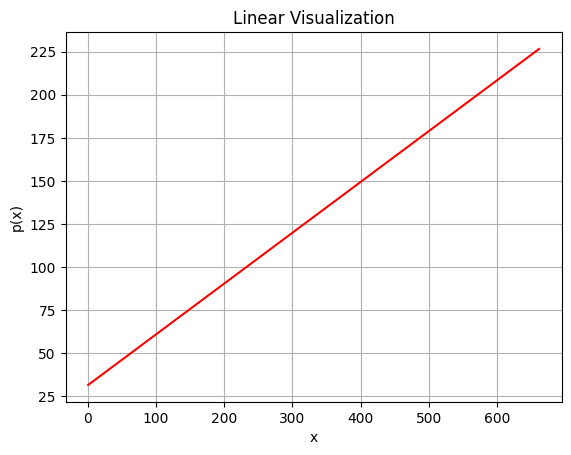

In [4]:

# 2. Generate a smooth range of x-values
linear_ti_ppi_poly_x = np.linspace(1, ti_ppi_df.shape[0], 500)

# 3. Calculate the corresponding y-values
linear_ti_ppi_poly_y = linear_ti_ppi_poly(linear_ti_ppi_poly_x)

# 4. Plot the polynomial
plt.plot(linear_ti_ppi_poly_x, linear_ti_ppi_poly_y, color='red')
plt.title('Linear Visualization')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()


In [7]:
sample_lol = generate_index(oil_df, 5)
flattened_list = [item for sublist in sample_lol for item in sublist]

print(len(flattened_list))

4470


In [8]:
#Test without unit_test
negative_values_test_input = generate_index(oil_df, 5)
flattened_list = [item for sublist in negative_values_test_input for item in sublist]
flattened_list_index = range(len(flattened_list))



def neg_values_test(list_of_values):
    for values in flattened_list_index:
        if flattened_list[values] < 0:
            print("Negative Value detected")
            break
    print("Test has Passed")

neg_values_test(flattened_list)

neg_values_test([3,-5,2,5])


Test has Passed
Test has Passed


## Mixed Regression prediction
This is where I try to incorporate linear, qudratic, and cubic regression into a price prediction for Titanium PPI based on solely Titanium PPI data.
Also, we will try assigning them different weights in perhaps a random forest or a neural net to see how it would do purely based on itself. 
1. Learn the regression methods in Python- Using closing price
2. Graph results
3. Feed the regression results (after 7 perhaps- as that helps show statistic significance) into ML model
4. 

In [9]:
print(linear_ti_ppi_poly)
print(quadratic_ti_ppi_poly)
print(cubic_ti_ppi_poly)
print(np.polyval(cubic_ti_ppi_poly,2))
print(np.polyval(cubic_ti_ppi_poly,range(45)))
len(ti_ppi_df['new_index'])

 
0.2956 x + 31.18
           2
-0.000189 x + 0.4201 x + 17.52
            3            2
-1.459e-06 x + 0.001254 x + 0.04015 x + 38.31
38.39278328119348
[38.3074715  38.3488781  38.39278328 38.4391783  38.48805438 38.53940279
 38.59321475 38.64948151 38.70819433 38.76934443 38.83292306 38.89892147
 38.96733091 39.0381426  39.1113478  39.18693775 39.2649037  39.34523688
 39.42792854 39.51296993 39.60035228 39.69006684 39.78210486 39.87645758
 39.97311623 40.07207207 40.17331634 40.27684028 40.38263513 40.49069214
 40.60100256 40.71355761 40.82834856 40.94536663 41.06460309 41.18604916
 41.30969609 41.43553512 41.56355751 41.69375449 41.8261173  41.96063719
 42.0973054  42.23611318 42.37705177]


660

In [10]:
#Step 1: random, but reproducible permutation of a,b, and c weights

rng = np.random.seed(42)

def sum_to_1():
    a = np.random.rand()
    b = (1 - a) * np.random.rand()
    c = 1 - a - b
    return(a, b, c)

#Step 2: plug those into the equations and calculate error

def root_sum_squred(input_list):
    sum_squares = 0
    for i in range(len(input_list)):
        sum_squares = sum_squares + (input_list[i] ** 2)
    return(np.sqrt(sum_squares))

def proportional_polynomials_errors(polyfxn_1, polyfxn_2, polyfxn_3, df):
    a, b, c = sum_to_1()
    range_input = range(len(df['new_index']))
    combination_p_x = a * np.polyval(polyfxn_1, range_input) + b * np.polyval(polyfxn_2, range_input) + c * np.polyval(polyfxn_3, range_input)
    error_results = ti_ppi_df['close'] - combination_p_x
    rss_errors = root_sum_squred(error_results)
    return(a, b, c, rss_errors)

print(proportional_polynomials_errors(linear_ti_ppi_poly, quadratic_ti_ppi_poly, cubic_ti_ppi_poly, ti_ppi_df))

#3 Now do this 10,000 times
results_rss = []
for i in range(10000):
    a, b, c, rss_errors = proportional_polynomials_errors(linear_ti_ppi_poly, quadratic_ti_ppi_poly, cubic_ti_ppi_poly, ti_ppi_df)
    input_row = {'a': a, 'b': b,  'c': c, "rss_errors" : rss_errors }
    results_rss.append(input_row)

results_rss_df = pd.DataFrame(results_rss)
display(results_rss_df)

(0.3745401188473625, 0.5946336570972584, 0.03082622405537916, np.float64(928.3330438032301))


,a,b,c,rss_errors
0,0.731994,0.160444,0.107562,930.431119
1,0.156019,0.131656,0.712325,907.402235
2,0.058084,0.815866,0.126051,922.560389
3,0.601115,0.282440,0.116445,927.745820
4,0.020584,0.949945,0.029471,926.518441
...,...,...,...,...
9995,0.089516,0.448563,0.461921,911.895416
9996,0.901038,0.086793,0.012168,938.085243
9997,0.046814,0.289481,0.663705,907.792563
9998,0.443320,0.095896,0.460784,914.487901


In [11]:
root_sum_squred([3,3,3,3,3,3])

np.float64(7.3484692283495345)

In [12]:
min(results_rss_df['rss_errors'])
matching_rows = results_rss_df.loc[results_rss_df['rss_errors'] == min(results_rss_df['rss_errors'])]
print(matching_rows)


             a         b        c  rss_errors
7999  0.004402  0.000329  0.99527  905.174769


## We have pre-liminary results
Our prelimiinary results suggest that the cubic function is superior to the linear and quadratic in every way, which means the standalone cubic function would likely do better than any combination.
We can test this by simply inserting all our inputs into the cubic function and see if we get smaller RSS errors.
Our conclusion is validated, the cubic function outperforms the linear and quadratic function such that their contributions to "predicting" the correct value is negative. 

In [13]:
cubic_output = np.polyval(cubic_ti_ppi_poly, range(len(ti_ppi_df['new_index'])))
print(root_sum_squred(ti_ppi_df['close'] - cubic_output))

905.1739897299874


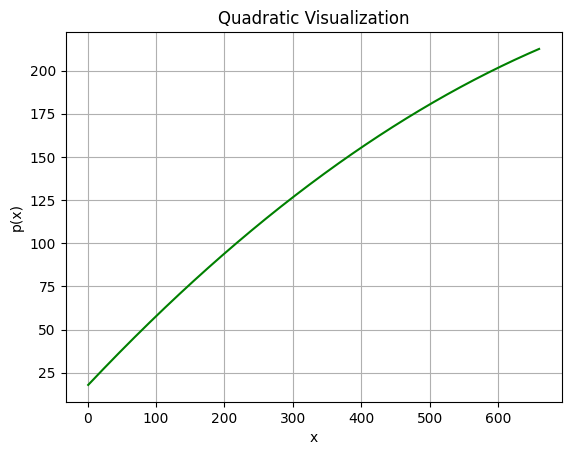

In [14]:
quadratic_ti_ppi_poly_x = np.linspace(1, ti_ppi_df.shape[0], 500)

# 3. Calculate the corresponding y-values
quadratic_ti_ppi_poly_y = quadratic_ti_ppi_poly(quadratic_ti_ppi_poly_x)

# 4. Plot the polynomial
plt.plot(quadratic_ti_ppi_poly_x, quadratic_ti_ppi_poly_y, color='green')
plt.title('Quadratic Visualization')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()


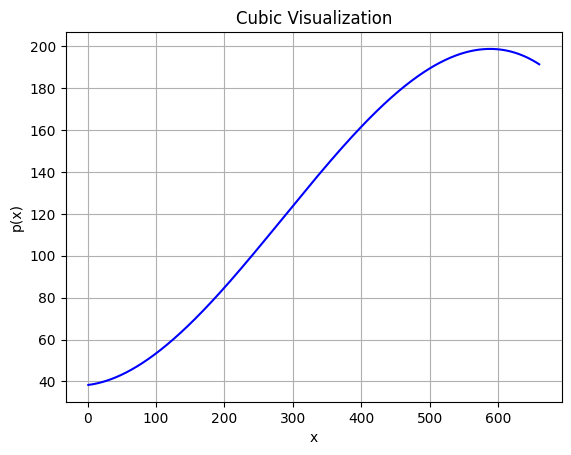

In [15]:
cubic_ti_ppi_poly_x = np.linspace(1, ti_ppi_df.shape[0], 500)

# 3. Calculate the corresponding y-values
cubic_ti_ppi_poly_y = cubic_ti_ppi_poly(cubic_ti_ppi_poly_x)

# 4. Plot the polynomial
plt.plot(cubic_ti_ppi_poly_x, cubic_ti_ppi_poly_y, color='blue')
plt.title('Cubic Visualization')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()


# We have input values...
Now that we have values/equations from our various regressions, which ML methods should we feed the p(x) "predictors"? We're going to shift the prediction endpoint by one to the left